<a href="https://colab.research.google.com/github/adi180397/traffic_sign_image_recog_/blob/main/traffic_sign_image_recog_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 610M/612M [00:05<00:00, 138MB/s]
100% 612M/612M [00:05<00:00, 122MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import numpy as np
from PIL import Image

data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((32, 32))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading image:', a)

data = np.array(data)
labels = np.array(labels)


In [ ]:
X_t1, X_t2, y_t1, y_t2 = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_t1.shape, X_t2.shape, y_t1.shape, y_t2.shape)
#Converting the labels into one hot encoding
y_t1 = to_categorical(y_t1, 43)
y_t2 = to_categorical(y_t2, 43)


(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_t1.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_t1, y_t1, batch_size=32, epochs=20, validation_data=(X_t2, y_t2))

Epoch 1/20
981/981 [==============================] - 18s 7ms/step - loss: 2.0977 - accuracy: 0.4515 - val_loss: 0.6926 - val_accuracy: 0.8104
Epoch 2/20
981/981 [==============================] - 6s 6ms/step - loss: 0.7283 - accuracy: 0.7791 - val_loss: 0.2323 - val_accuracy: 0.9415
Epoch 3/20
981/981 [==============================] - 5s 5ms/step - loss: 0.4563 - accuracy: 0.8605 - val_loss: 0.1814 - val_accuracy: 0.9529
Epoch 4/20
981/981 [==============================] - 6s 6ms/step - loss: 0.3612 - accuracy: 0.8940 - val_loss: 0.1188 - val_accuracy: 0.9647
Epoch 5/20
981/981 [==============================] - 6s 6ms/step - loss: 0.3152 - accuracy: 0.9080 - val_loss: 0.1351 - val_accuracy: 0.9643
Epoch 6/20
981/981 [==============================] - 7s 7ms/step - loss: 0.2655 - accuracy: 0.9222 - val_loss: 0.0975 - val_accuracy: 0.9717
Epoch 7/20
981/981 [==============================] - 5s 5ms/step - loss: 0.2702 - accuracy: 0.9239 - val_loss: 0.0854 - val_accuracy: 0.9770
Epoch

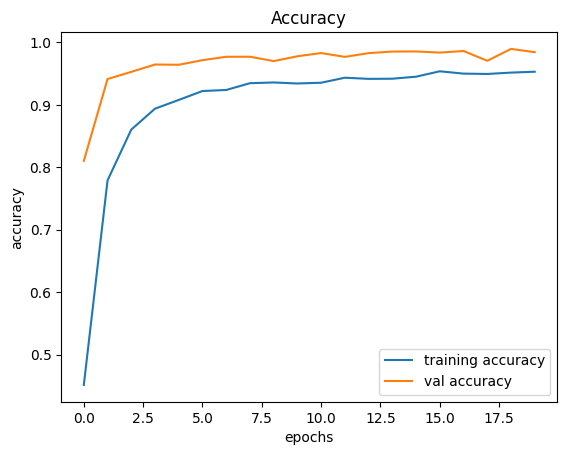

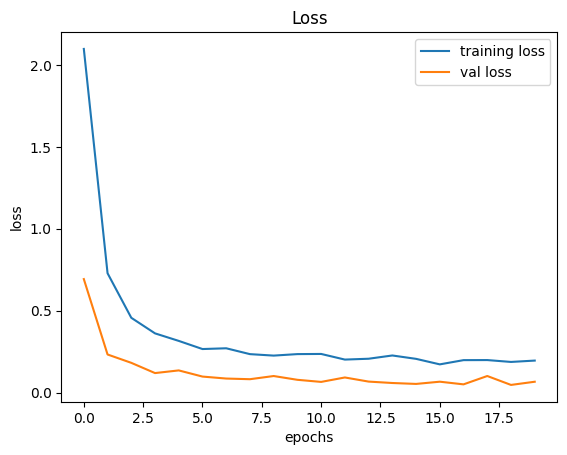

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from PIL import Image

# Load test data
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((32, 32))
    data.append(np.array(image))
X_test = np.array(data)

# Make predictions
pred = model.predict(X_test)

# Convert predictions to discrete class labels if needed
if pred.ndim > 1:  # Check if predictions are in continuous-multioutput format
    pred = np.argmax(pred, axis=1)

# Ensure labels and predictions are of the same type
labels = labels.astype(int)

# Compute accuracy
accuracy = accuracy_score(labels, pred)
print("Accuracy with the test data:", accuracy)


395/395 [==============================] - 1s 2ms/step
Accuracy with the test data: 0.9581947743467933


In [ ]:
model.save('traffic_sign_classifier')

In [ ]:
# import tkinter as tk
# from tkinter import filedialog
# from tkinter import *
# from PIL import ImageTk, Image
# import numpy
# #load the trained model to classify sign
# from keras.models import load_model
# model = load_model('traffic_sign_classifier')
# #dictionary to label all traffic signs class.
# classes = { 1:'Speed limit (20km/h)',
#            2:'Speed limit (30km/h)',
#            3:'Speed limit (50km/h)',
#            4:'Speed limit (60km/h)',
#            5:'Speed limit (70km/h)',
#            6:'Speed limit (80km/h)',
#            7:'End of speed limit (80km/h)',
#            8:'Speed limit (100km/h)',
#            9:'Speed limit (120km/h)',
#            10:'No passing',
#            11:'No passing veh over 3.5 tons',
#            12:'Right-of-way at intersection',
#            13:'Priority road',
#            14:'Yield',
#            15:'Stop',
#            16:'No vehicles',
#            17:'Veh > 3.5 tons prohibited',
#            18:'No entry',
#            19:'General caution',
#            20:'Dangerous curve left',
#            21:'Dangerous curve right',
#            22:'Double curve',
#            23:'Bumpy road',
#            24:'Slippery road',
#            25:'Road narrows on the right',
#            26:'Road work',
#            27:'Traffic signals',
#            28:'Pedestrians',
#            29:'Children crossing',
#            30:'Bicycles crossing',
#            31:'Beware of ice/snow',
#            32:'Wild animals crossing',
#            33:'End speed + passing limits',
#            34:'Turn right ahead',
#            35:'Turn left ahead',
#            36:'Ahead only',
#            37:'Go straight or right',
#            38:'Go straight or left',
#            39:'Keep right',
#            40:'Keep left',
#            41:'Roundabout mandatory',
#            42:'End of no passing',
#            43:'End no passing vehicle with a weight greater than 3.5 tons' }
# #initialise GUI
# top=tk.Tk()
# top.geometry('800x600')
# top.title('Traffic sign classification')
# top.configure(background='#CDCDCD')
# label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
# sign_image = Label(top)
# def classify(file_path):
#   #  global label_packed
#    image = Image.open(file_path)
#    image = image.resize((30,30))
#    image = numpy.expand_dims(image, axis=0)
#    image = numpy.array(image)
#    pred = model.predict_classes([image])[0]
#    sign = classes[pred+1]
#    print(sign)
#    label.configure(foreground='#011638', text=sign)
# def show_classify_button(file_path):
#    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
#    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
#    classify_b.place(relx=0.79,rely=0.46)
# def upload_image():
#   try:
#         file_path=filedialog.askopenfilename()
#         uploaded=Image.open(file_path)
#         uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
#         im=ImageTk.PhotoImage(uploaded)
#         sign_image.configure(image=im)
#         sign_image.image=im
#         label.configure(text='')
#         show_classify_button(file_path)
#   except:
#         pass
# upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
# upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
# upload.pack(side=BOTTOM,pady=50)
# sign_image.pack(side=BOTTOM,expand=True)
# label.pack(side=BOTTOM,expand=True)
# heading = Label(top, text="check traffic sign",pady=20, font=('arial',20,'bold'))
# heading.configure(background='#CDCDCD',foreground='#364156')
# heading.pack()
# top.mainloop()

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='max',classes=1000,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
# resnet_model.add(Dense(1200, activation='relu'))
# resnet_model.add(Dropout(rate=0.5))
# resnet_model.add(Dense(512, activation='relu'))
# resnet_model.add(Dense(43, activation='softmax'))
# resnet_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# resnet_model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# resnet_model.add(MaxPool2D(pool_size=(2, 2)))
# resnet_model.add(Dropout(rate=0.25))
# resnet_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',input_shape=X_t1.shape[1:]))
# resnet_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# resnet_model.add(MaxPool2D(pool_size=(2, 2)))
# resnet_model.add(Dropout(rate=0.25))
resnet_model.add(Flatten())
resnet_model.add(Dense(4100, activation='relu'))
resnet_model.add(Dropout(rate=0.25))
resnet_model.add(Dense(2048, activation='relu'))
resnet_model.add(Dense(1024, activation='relu'))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(rate=0.25))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dropout(rate=0.5))
resnet_model.add(Dense(43, activation='softmax'))
#Compilation of the model
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
resnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(X_t1, y_t1, batch_size=32, epochs=20, validation_data=(X_t2, y_t2))

Epoch 1/20
981/981 [==============================] - 25s 19ms/step - loss: 2.2578 - accuracy: 0.3319 - val_loss: 1.7134 - val_accuracy: 0.4452
Epoch 2/20
981/981 [==============================] - 18s 18ms/step - loss: 1.6688 - accuracy: 0.4694 - val_loss: 1.3987 - val_accuracy: 0.5446
Epoch 3/20
981/981 [==============================] - 18s 18ms/step - loss: 1.4395 - accuracy: 0.5467 - val_loss: 1.2877 - val_accuracy: 0.5822
Epoch 4/20
981/981 [==============================] - 18s 18ms/step - loss: 1.2514 - accuracy: 0.6097 - val_loss: 1.1433 - val_accuracy: 0.6408
Epoch 5/20
981/981 [==============================] - 19s 19ms/step - loss: 1.1518 - accuracy: 0.6449 - val_loss: 1.0235 - val_accuracy: 0.6705
Epoch 6/20
981/981 [==============================] - 17s 18ms/step - loss: 1.0568 - accuracy: 0.6756 - val_loss: 0.9549 - val_accuracy: 0.7058
Epoch 7/20
981/981 [==============================] - 18s 18ms/step - loss: 0.9748 - accuracy: 0.7055 - val_loss: 0.9068 - val_accuracy: